In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\عالم التكنولوجيا\OneDrive\Desktop\Project DataMining\crime_data.csv")

In [3]:
df.shape

(878049, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [5]:
df.sample(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
698471,2005-06-18 02:00:00,DISORDERLY CONDUCT,DISTURBING THE PEACE,Saturday,NORTHERN,NONE,1700 Block of POLK ST,-122.421075,37.792838
220456,2012-06-01 18:00:00,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Friday,PARK,UNFOUNDED,300 Block of DIVISADERO ST,-122.437447,37.772663
832445,2003-08-09 21:00:00,VEHICLE THEFT,"VEHICLE, RECOVERED, OTHER VEHICLE",Saturday,PARK,NONE,300 Block of BUENA VISTA EAST AV,-122.440721,37.766792


In [6]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [7]:
df.duplicated().sum()

2323

In [8]:
df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [9]:
df['Resolution'].value_counts()

Resolution
NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: count, dtype: int64

In [10]:
df['Address'].value_counts()

Address
800 Block of BRYANT ST           26533
800 Block of MARKET ST            6581
2000 Block of MISSION ST          5097
1000 Block of POTRERO AV          4063
900 Block of MARKET ST            3251
                                 ...  
PRECITA AV / CESAR CHAVEZ ST         1
0 Block of COLUSA PL                 1
2800 Block of KEITH ST               1
CABRILLO ST / ARGUELLO BL            1
OFARRELL ST / CYRIL MAGNIN ST        1
Name: count, Length: 23228, dtype: int64

In [11]:
df['Category'].value_counts()

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

In [12]:
df['Descript'].value_counts()

Descript
GRAND THEFT FROM LOCKED AUTO                              60022
LOST PROPERTY                                             31729
BATTERY                                                   27441
STOLEN AUTOMOBILE                                         26897
DRIVERS LICENSE, SUSPENDED OR REVOKED                     26839
                                                          ...  
ENCOURAGE MINOR TO USE CONTROLLED SUBSTANCE                   1
BIGAMY, INCEST, AND THE CRIME AGAINST NATURE (GENERAL)        1
DISTURBANCE OF NON-RELIGIOUS, NON-POLITICAL ASSEMBLY          1
CABLE TV CONNECTION OR DECODING DEVICE, UNAUTHORIZED          1
EMBEZZLEMENT, GRAND THEFT PUBLIC/PRIVATE OFFICIAL             1
Name: count, Length: 879, dtype: int64

In [13]:
df['PdDistrict'].value_counts()

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: count, dtype: int64

In [14]:
df['PdDistrict'].value_counts()

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: count, dtype: int64

In [15]:
df = df.drop_duplicates()

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(875726, 9)

In [18]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [19]:
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.hour

In [20]:
x = df[['X' , 'Y' ,'PdDistrict' , 'DayOfWeek']]
x.head()

,X,Y,PdDistrict,DayOfWeek
0,-122.425892,37.774599,NORTHERN,Wednesday
1,-122.425892,37.774599,NORTHERN,Wednesday
2,-122.424363,37.800414,NORTHERN,Wednesday
3,-122.426995,37.800873,NORTHERN,Wednesday
4,-122.438738,37.771541,PARK,Wednesday


In [21]:
y = df[['Category']]
y.head()

,Category
0,WARRANTS
1,OTHER OFFENSES
2,OTHER OFFENSES
3,LARCENY/THEFT
4,LARCENY/THEFT


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

. Application of Mining Techniques :

1- clustering by Hierarchical clustering :

In [23]:
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
import matplotlib.pyplot as plt

In [24]:
pd.DataFrame(df)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0


In [25]:
# Random Sample from data to make Hierarchical clustering on it :
sample_df = df.sample(n=2000 , random_state=42)

In [26]:
# Choose important cols that benefit us :
imp_features = sample_df[['DayOfWeek', 'PdDistrict', 'Resolution', 'X', 'Y']]

In [27]:
# Convert the previous features into Numeric Values :
le = LabelEncoder()
Features_Encoded = imp_features.apply(le.fit_transform)

In [28]:
# build linkage by (Single , Complete , Average , Ward) method :
z1 = linkage(Features_Encoded, method='single', metric='euclidean')
z2 = linkage(Features_Encoded, method='complete', metric='euclidean')
z3 = linkage(Features_Encoded, method='average', metric='euclidean')
z4 = linkage(Features_Encoded, method='ward', metric='euclidean')

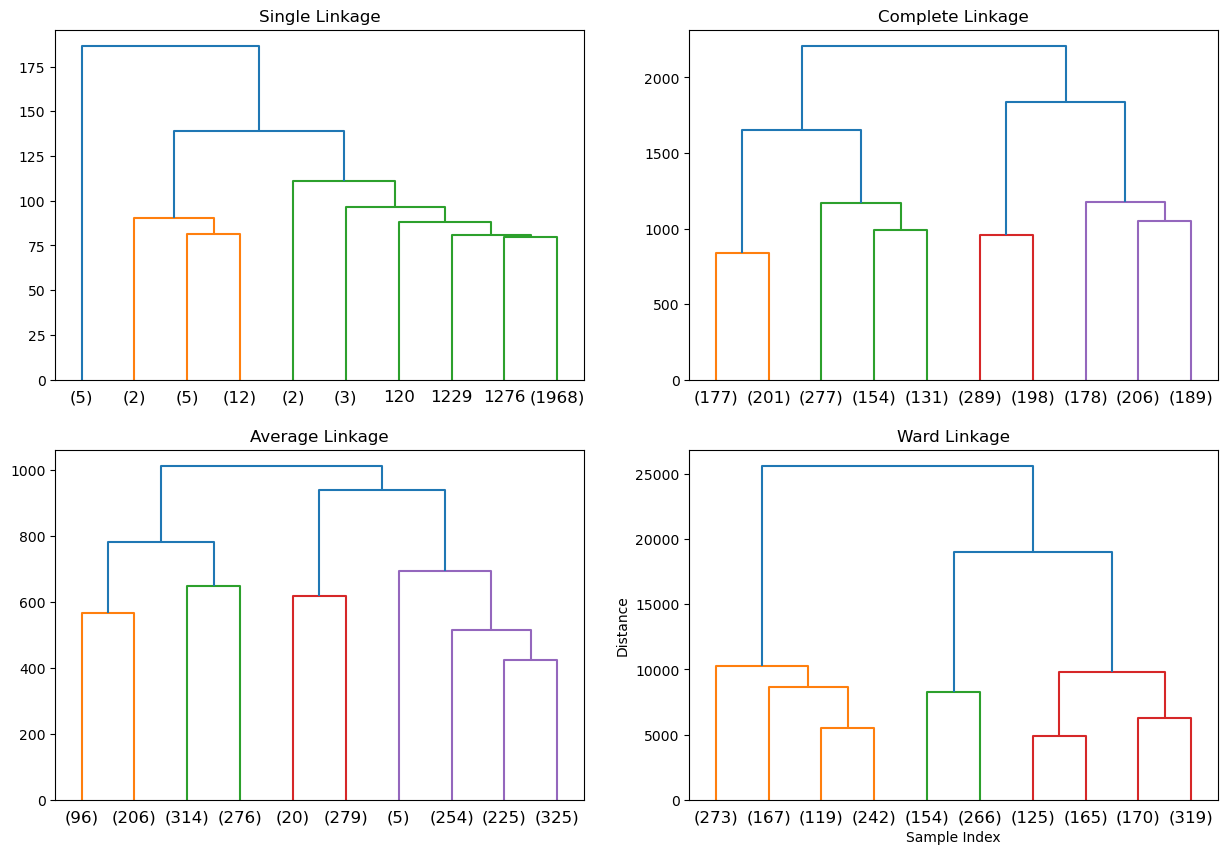

In [29]:
# bulid dendogram :
# (truncate_mode) : You control cutting of the tree so that it does not become long and complex
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(z1, truncate_mode='lastp', p=10), plt.title('Single Linkage')
plt.subplot(2,2,2), dendrogram(z2, truncate_mode='lastp', p=10), plt.title('Complete Linkage')
plt.subplot(2,2,3), dendrogram(z3, truncate_mode='lastp', p=10), plt.title('Average Linkage')
plt.subplot(2,2,4), dendrogram(z4, truncate_mode='lastp', p=10), plt.title('Ward Linkage')
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [30]:
# Cutting the tree into n_clusters :
n_clusters = 2
cluster_labels = fcluster(z4, n_clusters, criterion='maxclust')

In [31]:
# Add this col into data :
sample_df["Cluster"] = cluster_labels

In [32]:
sample_df[["Category", "PdDistrict", "Cluster"]]

,Category,PdDistrict,Cluster
34122,LARCENY/THEFT,SOUTHERN,2
134016,OTHER OFFENSES,NORTHERN,2
74807,LARCENY/THEFT,BAYVIEW,2
519926,ROBBERY,SOUTHERN,2
31585,STOLEN PROPERTY,NORTHERN,2
...,...,...,...
225697,ASSAULT,CENTRAL,2
290034,LARCENY/THEFT,NORTHERN,1
543892,LARCENY/THEFT,SOUTHERN,2
796155,LARCENY/THEFT,SOUTHERN,2


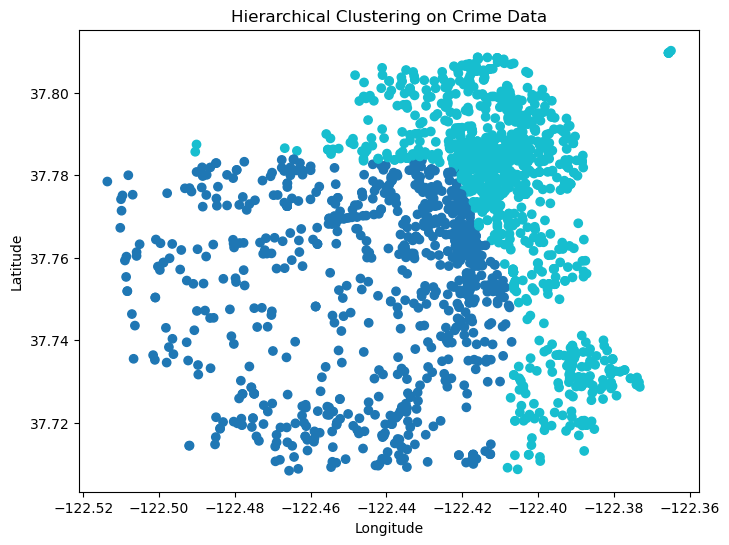

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(sample_df["X"], sample_df["Y"], c=sample_df["Cluster"], cmap="tab10")
plt.title("Hierarchical Clustering on Crime Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

2- Classification by Decision Tree :

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report 

In [35]:
# Random Sample from data to make Hierarchical clustering on it :
Sample_df = df.sample(n=2000 , random_state=42)

In [36]:
Features = Sample_df[["DayOfWeek", "PdDistrict", "Resolution", "X", "Y"]]
Target = Sample_df["Category"]

In [37]:
LE = LabelEncoder()
LE_Features = Features.apply(LE.fit_transform)
LE_Target = LE.fit_transform(Target)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(LE_Features, LE_Target, test_size=0.2, random_state=42)

In [39]:
# Train the Decision Tree :
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred = DTC.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.17      0.24      0.20        29
           2       0.00      0.00      0.00         0
           3       0.08      0.11      0.09        18
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.27      0.19      0.22        16
           7       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         9
          15       0.33      0.37      0.35        81
          17       0.00      0.00      0.00         1
          18       0.50      0.33      0.40        12
          19       0.29      0.21      0.24        56
          20       0.24      0.27      0.26        44
          21       0.00      0.00      0.00         1
   

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklea

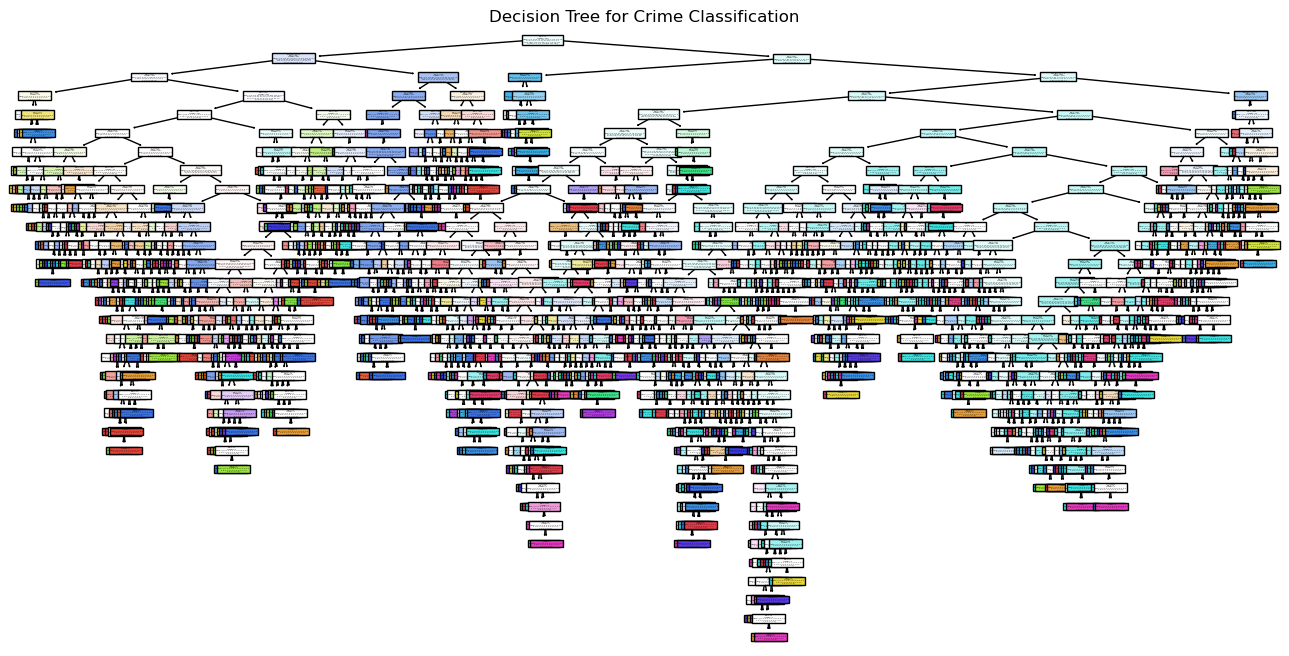

In [41]:
# Draw Decision tree :
plt.figure(figsize=(16, 8))
plot_tree(DTC, filled=True, feature_names=Features.columns)
plt.title("Decision Tree for Crime Classification")
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, f1_score

Accuracy of all data is 0.33 (it isn't the best Accuray to make decsion)

In [43]:
accuracy = accuracy_score(y_test, y_pred)

In [44]:
f1 = f1_score(y_test, y_pred, average='weighted')

In [45]:

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.2050


In [46]:
print(f"F1-Score: {f1:.4f}")


F1-Score: 0.2076


In [47]:
top_crimes = df['Category'].value_counts().head(10)


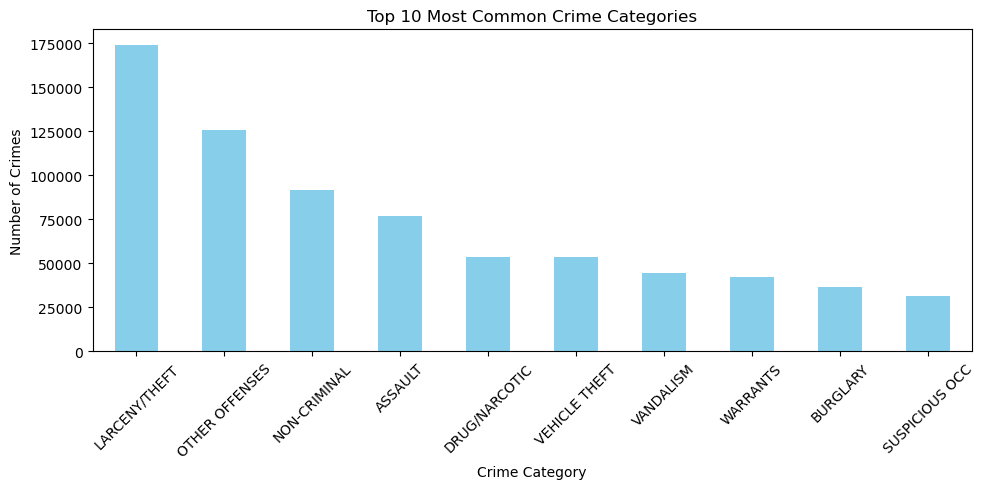

In [48]:
plt.figure(figsize=(10,5))
top_crimes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Crime Categories')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['X'],y=df['Y'], cmap="Reds",fill=True,bw_adjust=1,thresh=0.2)
plt.title("Crime Heatmap")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.grid(True)
plt.show()

In [50]:
hourly_crimes = df['Hour'].value_counts().sort_index().values.reshape(-1, 1)

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans_time = KMeans(n_clusters=3, random_state=42)
kmeans_time.fit(hourly_crimes)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

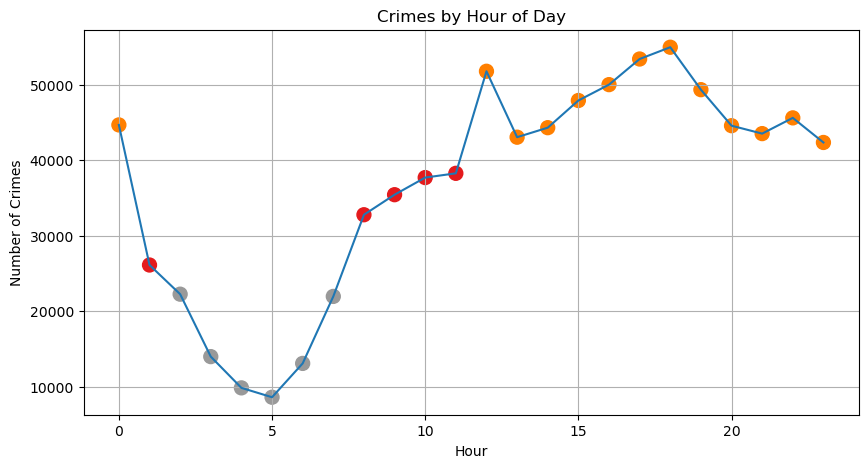

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(range(24), hourly_crimes, c=kmeans_time.labels_, cmap='Set1', s=100)
df['Hour'].value_counts().sort_index().plot(kind='line')
plt.title('Crimes by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

In [54]:
coords = df[['X', 'Y']].copy()

In [55]:
coords = coords[(coords['X'] != 0) & (coords['Y'] != 0)]

In [56]:
Q1 = coords.quantile(0.25)
Q3 = coords.quantile(0.75)
IQR = Q3 - Q1
coords = coords[~((coords < (Q1 - 1.5 * IQR)) | (coords > (Q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(coords)

KMeans(n_clusters=5, random_state=42)

In [58]:

df['Cluster'] = kmeans.predict(df[['X', 'Y']])
coords['Cluster'] = kmeans.labels_

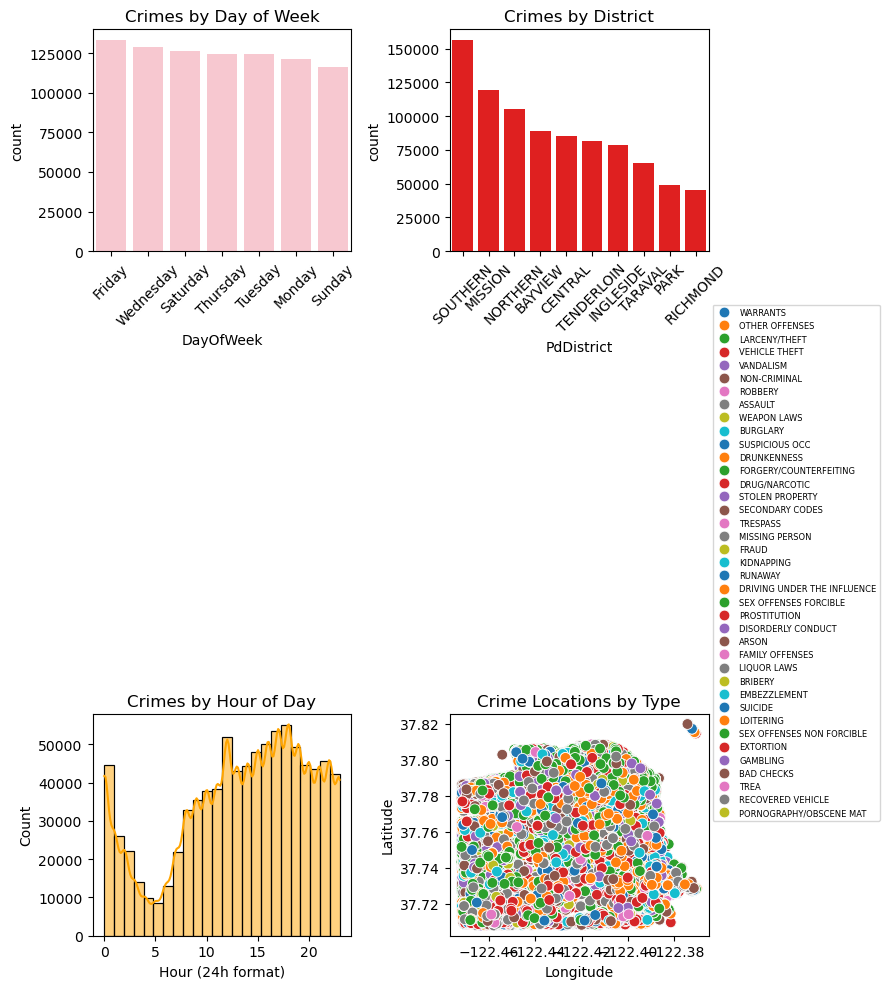

In [66]:
plt.figure(figsize=(9,10))

plt.subplot(2, 2, 1)
sns.countplot(x='DayOfWeek', data=df,color='pink' ,order=df['DayOfWeek'].value_counts().index)
plt.title("Crimes by Day of Week")
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x='PdDistrict', data=df,color='red', order=df['PdDistrict'].value_counts().index)
plt.title("Crimes by District")
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.histplot(df['Hour'], bins=24, kde=True, color='orange')
plt.title("Crimes by Hour of Day")
plt.xlabel("Hour (24h format)")

plt.subplot(2, 2, 4)
sns.scatterplot(x=coords['X'], y=coords['Y'], hue='Category', data=df, palette='tab10', s=60)
plt.title("Crime Locations by Type")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5),fontsize=6)

plt.tight_layout()
plt.show()